## Energy Prediction

In [41]:
import datetime
import time

In [42]:
data=pd.read_csv('T1.csv')
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [43]:
data.rename(columns={'Theoretical_Power_Curve (KWh)':'Power','LV ActivePower (kW)':'ActivePower',"Wind Speed (m/s)":"WindSpeed","Wind Direction (°)":"WindDirection"},
                inplace=True)
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [44]:
data['Time']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40


In [45]:
temp=data['Time'][1:].values - data['Time'][0:-1].values
temp=np.array([0]+list(temp))

In [46]:
data['TimeDiff']=temp

In [47]:
data.tail()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,10,10
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,20,10
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,30,10
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,40,10
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620,50,10


In [48]:
data['Gust']=np.array([0]+list(data['WindSpeed'][1:].values-data['WindSpeed'][:-1].values))
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,0,0,0.000000
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20,10,-0.456130
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40,10,-0.081733


In [49]:
data.dtypes

Date/Time         object
ActivePower      float64
WindSpeed        float64
Power            float64
WindDirection    float64
Time               int64
TimeDiff           int64
Gust             float64
dtype: object

In [50]:
data_=data[data['TimeDiff'].isin([10,-50])]
data_.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20,10,-0.456130
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40,10,-0.081733
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,50,10,0.026111


In [51]:
len(data_)

50500

In [52]:
data_=data_[data_['ActivePower']>=0]
data_.describe()

,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
count,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000
mean,1309.932554,7.565593,1494.454238,123.716485,24.997125,-0.002181,0.001787
std,1312.471586,4.226063,1367.906548,93.425141,17.078962,22.362852,0.742791
min,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,-14.075440
25%,53.512621,4.212597,163.517562,49.344398,10.000000,10.000000,-0.380538
50%,828.896973,7.114135,1068.206544,73.689552,20.000000,10.000000,0.001451
75%,2485.947510,10.307985,2969.201056,201.697906,40.000000,10.000000,0.379923
max,3618.732910,25.206011,3600.000000,359.997589,50.000000,10.000000,17.411289


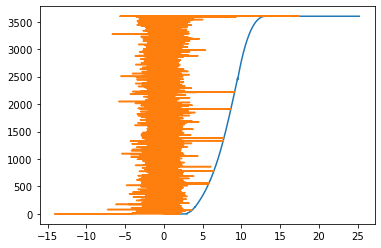

In [53]:
x=data_.sort_values(by='WindSpeed')['WindSpeed']
y=data_.sort_values(by='WindSpeed')['Power']
z=data_.sort_values(by='WindSpeed')['Gust']

plt.plot(x,y)
plt.plot(z,y)

In [54]:
x_train=data_[['WindSpeed','WindDirection','Gust']].values
y_train=data_['ActivePower'].values

## Training

In [55]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, StackingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

In [56]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=15).get_n_splits(data_.values)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [57]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.5))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score


Lasso score: 532.5939 (166.2872)



array([838.45847838, 438.69383302, 350.88994159, 482.73217465,
       552.19514451])

In [58]:
HistGB=HistGradientBoostingRegressor(learning_rate=0.18,max_iter=100,max_leaf_nodes=4)

score = rmsle_cv(HistGB)
print("Hist Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score

Hist Gradient Boosting score: 392.9342 (190.7309)



array([706.68074765, 267.68963625, 208.6759408 , 260.79656892,
       520.82826174])

In [59]:

KNR=KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto', leaf_size=100, p=1, metric='minkowski')

score = rmsle_cv(KNR)
print("KNR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score

KNR score: 432.0385 (180.3508)



array([717.42917953, 294.25463431, 250.46500532, 329.32630819,
       568.71743596])

In [60]:
model_xgb1 = xgb.XGBRegressor(learning_rate=2e-2, max_depth=4, 
                             min_child_weight=1.1, n_estimators=100,
                             reg_alpha=0.3, reg_lambda=0.7,
                             #subsample=0.5213, silent=1,
                             nthread = -1)

In [61]:
model_xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.02, max_delta_step=0, max_depth=4,
             min_child_weight=1.1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.3,
             reg_lambda=0.7, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [62]:
preds=model_xgb1.predict(x_train)
score=mean_squared_error(y_train,preds)
score**0.5

450.24259360681566

In [63]:
r2_score(y_train,preds)

0.882314774332115

In [64]:
model_xgb1.predict(np.array([6.02,110.0,0.23]).reshape(1,-1))

array([454.7521], dtype=float32)

In [65]:
model_lgb1 = lgb.LGBMRegressor(objective='regression',num_leaves=2,
                              learning_rate=0.07, n_estimators=80,
                              #max_bin = 255, bagging_fraction = 0.8,
                              #bagging_freq = 5, feature_fraction = 0.8,
                              #feature_fraction_seed=9, bagging_seed=9,
                              reg_alpha=0.3,reg_lambda=0.7,
                              #min_data_in_leaf =3, min_sum_hessian_in_leaf = 2
                             )

In [66]:
model_lgb1.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.07, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=80, n_jobs=-1, num_leaves=2, objective='regression',
              random_state=None, reg_alpha=0.3, reg_lambda=0.7, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [67]:
preds=model_lgb1.predict(x_train)
score=mean_squared_error(y_train,preds)
score**0.5

391.9123625549006

In [68]:
r2_score(y_train,preds)

0.910832474267455

In [69]:
model_lgb1.predict(np.array([6.02,110.0,0.23]).reshape(1,-1))

array([542.52738079])

## Testing

In [70]:
test=[]
for i in range(1,6):
    test.append(pd.read_csv(f'../input/testwindpower/test{i}.csv'))


In [71]:
test=pd.concat(test,axis=0)
test.head()

,Date,Speed (m/s),Direction (º),Energy (kWh)
0,02/02/2019 00:10:00,"9,80",320,"1.110,15"
1,02/02/2019 00:20:00,"12,56",315,"1.538,99"
2,02/02/2019 00:30:00,"10,77",306,"1.249,69"
3,02/02/2019 00:40:00,"9,59",310,"906,68"
4,02/02/2019 00:50:00,"8,89",308,"910,95"


In [72]:
test.sort_values(by='Date',inplace=True)
test.head()

,Date,Speed (m/s),Direction (º),Energy (kWh)
0,01/02/2019 00:10:00,"12,66",224,"1.988,51"
1,01/02/2019 00:20:00,"14,01",225,"2.136,08"
2,01/02/2019 00:30:00,"12,32",220,"2.050,72"
3,01/02/2019 00:40:00,"13,08",218,"2.028,79"
4,01/02/2019 00:50:00,"12,59",220,"1.739,57"


In [73]:
test.columns=['Date','Speed','Direction','Energy']
test.head()

,Date,Speed,Direction,Energy
0,01/02/2019 00:10:00,"12,66",224,"1.988,51"
1,01/02/2019 00:20:00,"14,01",225,"2.136,08"
2,01/02/2019 00:30:00,"12,32",220,"2.050,72"
3,01/02/2019 00:40:00,"13,08",218,"2.028,79"
4,01/02/2019 00:50:00,"12,59",220,"1.739,57"


In [74]:
len(test)

9360

In [75]:
for col in test.columns[1::2]:
    test[col]=test[col].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [76]:
test.head()

,Date,Speed,Direction,Energy
0,01/02/2019 00:10:00,12.66,224,1988.51
1,01/02/2019 00:20:00,14.01,225,2136.08
2,01/02/2019 00:30:00,12.32,220,2050.72
3,01/02/2019 00:40:00,13.08,218,2028.79
4,01/02/2019 00:50:00,12.59,220,1739.57


In [77]:
test['Gust']=np.array([0]+list(test['Speed'][1:].values-test['Speed'][:-1]))
test.head()

,Date,Speed,Direction,Energy,Gust
0,01/02/2019 00:10:00,12.66,224,1988.51,0.00
1,01/02/2019 00:20:00,14.01,225,2136.08,1.35
2,01/02/2019 00:30:00,12.32,220,2050.72,-1.69
3,01/02/2019 00:40:00,13.08,218,2028.79,0.76
4,01/02/2019 00:50:00,12.59,220,1739.57,-0.49


In [78]:
x_val=test[['Speed','Direction','Gust']].values
y_val=test['Energy'].values
x_val.shape

(9360, 3)

In [79]:
preds1=model_xgb1.predict(x_val)
preds1.shape

(9360,)

In [80]:
preds2=model_lgb1.predict(x_val)
preds2.shape

(9360,)

## XGBoost Score

In [81]:
score=mean_squared_error(y_val,preds1)
score**0.5

497.9233538118226

In [82]:
r2_score(y_val,preds1)

0.3821888069845253

## LGBM Score

In [83]:
score=mean_squared_error(y_val,preds2)
score**0.5

649.5104328653177

In [84]:
r2_score(y_val,preds2)

-0.05124282001762803

## Let's See the Predictions

Text(0.5, 1.0, 'XGB')

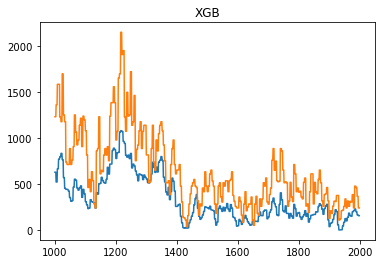

In [85]:
sam=1000
f=2
plt.plot(range(sam,f*sam),y_val[sam:f*sam])
plt.plot(range(sam,f*sam),preds1[sam:f*sam])
plt.title('XGB')

Text(0.5, 1.0, 'LGB')

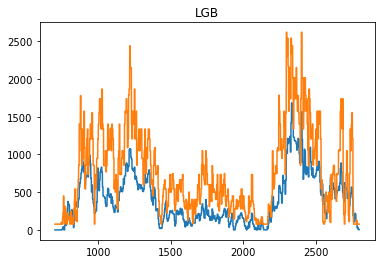

In [86]:
sam=700
f=4
plt.plot(range(sam,f*sam),y_val[sam:f*sam])
plt.plot(range(sam,f*sam),preds2[sam:f*sam])
plt.title('LGB')